In [1]:
import os
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### face Detection
def detectFace(gray_img):
    cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
    faces = cascade.detectMultiScale(gray_img,scaleFactor=1.25,minNeighbors = 5,minSize = (30,30))
    return faces,gray_img

In [3]:
def train_label_generator(directory):
    
    faceID_list =[]
    faces_list = []
    
    for filepath in glob.glob('images/*/*',recursive=True):
        faceID = filepath.rsplit('\\',1)[0].rsplit('\\')[-1]
        img = cv2.imread(filepath,0)
        if img is None:
            print(img," not loaded !!")
        faces_rect,gray_img = detectFace(img)

        if len(faces_rect)==1:
            (x,y,w,h)=faces_rect[0]
            roi_gray=gray_img[y:y+w,x:x+h]
            faceID_list.append(faceID)
            faces_list.append(roi_gray)
    
    return faceID_list, faces_list

In [4]:
def train_classifier(faces,faceID):
    face_recognizer=cv2.face.LBPHFaceRecognizer_create()
    face_recognizer.train(faces,np.array(faceID))
    return face_recognizer

In [5]:
def draw_rect(test_img,face):
    x,y,w,h =face
    cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=5)

In [6]:
def put_text(test_img,text,x,y):
    cv2.putText(test_img,text,(x,y),cv2.FONT_HERSHEY_DUPLEX,2,(255,0,0),4)

In [7]:
def predict_face(model,test_img_path,faces_dict,image = None):
    
    if test_img_path:
        test_img = cv2.imread(test_img_path,0)
    elif image is not None:
        test_img = image
   
    faces, img = detectFace(test_img)
    
    print("Number of faces detect :",len(faces))
    for face in faces:
        x,y,w,h = face
       
        roi_test_face = img[y:y+h,x:x+w]
        faceID,confidence = model.predict(roi_test_face)
        print(faceID, faces_dict[faceID])
        faceName = faces_dict[faceID]
        draw_rect(test_img,face)
        put_text(test_img,faceName,x,y)
        
    return  test_img  

### Driver

In [8]:
### Train model
faceID,faces = train_label_generator('images/')
faces_dict = dict(enumerate(faceID))
face_recognizer =  train_classifier(faces,list(faces_dict.keys()))

In [9]:
faces_dict

{0: 'anurag',
 1: 'anurag',
 2: 'anurag',
 3: 'anurag',
 4: 'anurag',
 5: 'anurag',
 6: 'anurag',
 7: 'anurag',
 8: 'saurabh',
 9: 'saurabh',
 10: 'saurabh',
 11: 'saurabh',
 12: 'saurabh',
 13: 'saurabh',
 14: 'saurabh',
 15: 'saurabh',
 16: 'saurabh'}

### Test Images

Number of faces detect : 1
8 saurabh


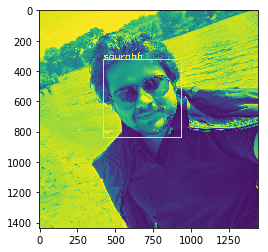

In [11]:
test_img_path = './images/saurabh/1.jpg'
img = predict_face(face_recognizer,test_img_path,faces_dict)
plt.imshow(img)

## Using Camera

In [12]:
cap = cv2.VideoCapture(0)

while True:
    
    ret,frame = cap.read()
   
    if ret:
        gray_img = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        test_img = predict_face(face_recognizer,None,faces_dict,gray_img)
        cv2.imshow('myframe',test_img)
    else:
        print("No Image found !!")
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

Number of faces detect : 0
Number of faces detect : 0
Number of faces detect : 0
Number of faces detect : 0
Number of faces detect : 0
Number of faces detect : 0
Number of faces detect : 0
Number of faces detect : 0
Number of faces detect : 0
Number of faces detect : 0
Number of faces detect : 0
Number of faces detect : 0
Number of faces detect : 0
Number of faces detect : 0
Number of faces detect : 0
Number of faces detect : 0
Number of faces detect : 0
Number of faces detect : 0
Number of faces detect : 0
Number of faces detect : 0
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Numb

Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
14 saurabh
Number of faces detect : 1
7 anurag
Number of faces detect : 0
Number of faces detect : 1
15 saurabh
Number of faces detect : 

Number of faces detect : 2
15 saurabh
15 saurabh
Number of faces detect : 2
15 saurabh
15 saurabh
Number of faces detect : 2
15 saurabh
15 saurabh
Number of faces detect : 2
15 saurabh
15 saurabh
Number of faces detect : 2
15 saurabh
14 saurabh
Number of faces detect : 2
15 saurabh
14 saurabh
Number of faces detect : 2
15 saurabh
15 saurabh
Number of faces detect : 2
14 saurabh
15 saurabh
Number of faces detect : 2
15 saurabh
14 saurabh
Number of faces detect : 2
15 saurabh
14 saurabh
Number of faces detect : 2
15 saurabh
15 saurabh
Number of faces detect : 2
15 saurabh
15 saurabh
Number of faces detect : 2
14 saurabh
15 saurabh
Number of faces detect : 2
14 saurabh
15 saurabh
Number of faces detect : 2
14 saurabh
15 saurabh
Number of faces detect : 2
14 saurabh
15 saurabh
Number of faces detect : 2
14 saurabh
15 saurabh
Number of faces detect : 2
15 saurabh
14 saurabh
Number of faces detect : 2
15 saurabh
14 saurabh
Number of faces detect : 2
15 saurabh
14 saurabh
Number of faces dete